
**ZuckFlix**

*A data analysis using Python to give a streaming proposal.*


---


By: Josue Salvador Cano Martinez.

Facebook Data Challenge 2021. California, United States.



Importing libraries.

Analyzing DB in a general way.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv("/content/drive/MyDrive/netflix_titles.csv", index_col=0)
print(df.shape)
print(df.info())
df.head()

(7787, 11)
<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, s1 to s7787
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7787 non-null   object
 1   title         7787 non-null   object
 2   director      5398 non-null   object
 3   cast          7069 non-null   object
 4   country       7280 non-null   object
 5   date_added    7777 non-null   object
 6   release_year  7787 non-null   int64 
 7   rating        7780 non-null   object
 8   duration      7787 non-null   object
 9   listed_in     7787 non-null   object
 10  description   7787 non-null   object
dtypes: int64(1), object(10)
memory usage: 730.0+ KB
None


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


Calculate the number of null values in each column.

In [ ]:
df.isnull().sum()

type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Remove null values from rating and date_added columns.

We do not require Country data because we have previously selected the country: United States.
The cast and director columns will not be used in the analysis, therefore their null values do not interfere with the results.

In [ ]:
df = df.dropna(how='any', subset=['date_added', 'rating'])
df.isnull().sum()

type               0
title              0
director        2376
cast             718
country          505
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

Add a new column that contains only the years of the dates from the date_added records.

In [ ]:
df['year_added'] = df['date_added'].apply(lambda x: x.split(" ")[-1])
df.head(3)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
show_id,,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018


Change date_added column to date format.

In [ ]:
df["date_added"] = pd.to_datetime(df["date_added"], dayfirst = True)
df.head(3)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
show_id,,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018


Dataframe only for the United States records and percentage it represents of the total.

In [ ]:
unitedStates = df[df['country'] == 'United States']
unitedStatesCount = unitedStates['country'].count() / df.shape[0] * 100
print(unitedStatesCount)

32.76705276705277


Types of content that are in the United States Frame.

In [ ]:
unitedStates.type.unique()

array(['Movie', 'TV Show'], dtype=object)

Total number of Movies vs total number of TV Shows

Conclusion: it is possible to notice the predominance of Movies.

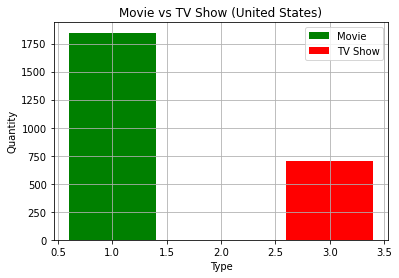

In [ ]:
movie = unitedStates[unitedStates["type"] == "Movie"]
movieCount = movie["type"].count()

tvShow = unitedStates[unitedStates["type"] == "TV Show"]
tvShowCount = tvShow["type"].count()

plt.bar(1, movieCount, label="Movie", color='g')
plt.bar(3, tvShowCount, label="TV Show", color='r')
plt.plot()

plt.xlabel("Type")
plt.ylabel("Quantity")
plt.title("Movie vs TV Show (United States)")
plt.grid(True)
plt.legend()
plt.show()

Frequency with which content is added regarding Movies and TV Shows during the last years.

Conclusion: it is possible to notice the predominance of Movies.

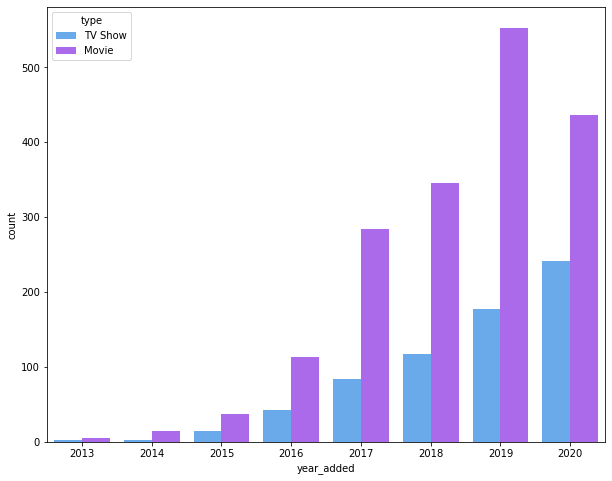

In [ ]:
plt.figure(figsize=(10,8))
sb.countplot(x="year_added", data=unitedStates, palette="cool", order=unitedStates["year_added"].value_counts().sort_index(ascending=True).index[5:13],hue=df['type'])

Release years that are mostly repeated in the streaming content.

Conclusion: the most popular streaming content is that which has been released after 2015.



In [ ]:
releaseYear = unitedStates.release_year.unique()
print(releaseYear)

unitedStates["release_year"].value_counts().nlargest(10).to_frame()

[2009 2008 1997 2017 2019 2015 2020 2016 2005 2014 2018 2013 2000 2011
 2004 1993 2012 2006 1998 1988 1996 2002 1986 1974 1999 1991 2001 2003
 2007 1995 2010 1992 1978 1989 1967 1960 2021 1976 1958 1973 1983 1987
 1971 1977 1956 1990 1981 1984 1945 1946 1962 1980 1942 1994 1955 1979
 1982 1985 1968 1972 1965 1944 1963 1947 1969 1943 1954]


,release_year
2019,359
2017,350
2018,347
2020,332
2016,253
2015,139
2014,83
2013,77
2012,61
2011,51


The most popular durations of streaming content.

Conclusion: the most predominant movies have a duration that oscillates the 90 minutes.

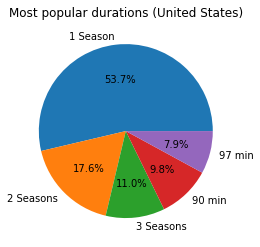

In [ ]:
unitedStates['duration'].value_counts().nlargest(5).plot(kind="pie", autopct='%1.1f%%', title="Most popular durations (United States)", ylabel="")

Most viewed Genres.

Conclusion: Documentaries, Stand-Up Comedy and Children & Family Movies 


In [ ]:
unitedStates["listed_in"].value_counts().to_frame()

,listed_in
Documentaries,232
Stand-Up Comedy,206
"Children & Family Movies, Comedies",81
Dramas,78
Children & Family Movies,78
...,...
"Kids' TV, TV Action & Adventure",1
"TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows",1
"Classic Movies, Comedies, Dramas",1
"TV Action & Adventure, TV Dramas, TV Mysteries",1


Graphic representation of the most viewed genres.

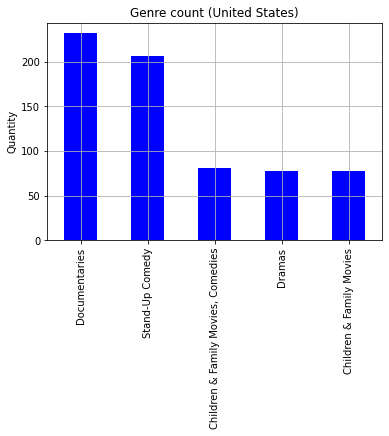

In [ ]:
unitedStates["listed_in"].value_counts().nlargest(5).plot(kind="bar", grid="True", color='b', ylabel="Quantity", title="Genre count (United States)")

Most watched genre trend.

In [ ]:
firstGenre = unitedStates[unitedStates['listed_in'] == 'Documentaries']
secondGenre = unitedStates[unitedStates['listed_in'] == 'Stand-Up Comedy']
thirdGenre = unitedStates[unitedStates['listed_in'] == 'Children & Family Movies, Comedies']

topGenre = pd.concat([firstGenre, secondGenre, thirdGenre])

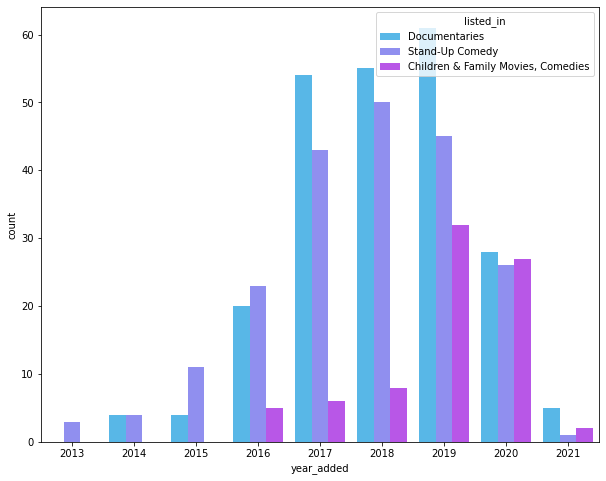

In [ ]:
plt.figure(figsize=(10,8))
sb.countplot(x="year_added", data = topGenre, palette="cool", order=topGenre['year_added'].value_counts().sort_index(ascending=True).index[1:11],hue=topGenre['listed_in'])

The most popular ratings.

Conclusion: TV-MA, TV-14 and R.

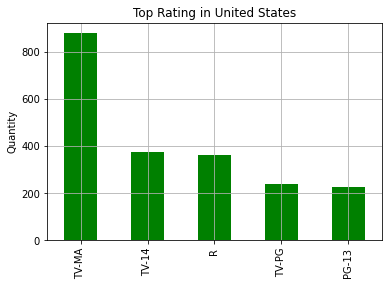

In [ ]:
ratingsVisualization = unitedStates.rating.value_counts().nlargest(5).plot(kind = 'bar', grid = "True", color = "g", ylabel="Quantity", title="Top Rating in United States")